# Using RandomForestRegressor to Build a Regression Model

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [4]:
# Read wine quality data from UCI website
x_list = []
labels = []
names = []
first_line = True
data_path = './data/winequality-red.csv'

with open(data_path) as data:
    
    for line in data:
        
        if first_line:
            names = line.strip().split(';')
            first_line = False
            
        else:
            # split on semi-colon
            row = line.strip().split(';')
            
            # put labels in separate array
            labels.append(float(row[-1]))
            
            # remove label from row
            row.pop()
            
            # convert row to floats
            float_row = [float(num) for num in row]
            x_list.append(float_row)

In [20]:
n_rows = len(x_list)
n_cols = len(x_list[0])

x = np.array(x_list)
y = np.array(labels)
wine_names = np.array(names)

# take fixed holdout set of 30% of data rows
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=531)

# train Random Forest at ar ange of ensemble sizes in order to see how the mse changes
mse_oos = []
n_tree_list = range(50, 500, 10)

for i_trees in n_tree_list:
    depth = None
    # try tweaking
    max_feat = 4 
    wine_rf_model = ensemble.RandomForestRegressor(n_estimators=i_trees, max_depth=depth, max_features=max_feat, 
                                                   oob_score=False, random_state=531)
    wine_rf_model.fit(x_train, y_train)
    
    # Accumulate mse on test set
    prediction = wine_rf_model.predict(x_test)
    mse_oos.append(mean_squared_error(y_test, prediction))
    
print(f'MSE: {mse_oos[-1]}')

MSE: 0.3184462723865057


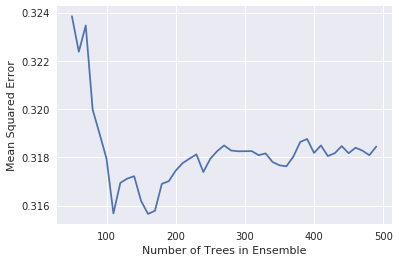

In [21]:
# plot training and test errors vs number of trees in ensemble
plt.plot(n_tree_list, mse_oos)
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Mean Squared Error')
plt.show()

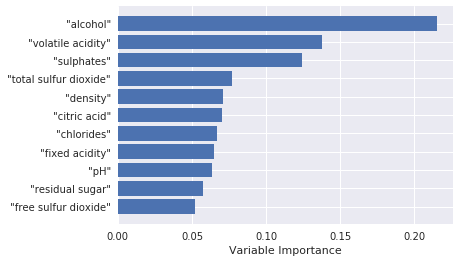

In [22]:
# Plot feature importance
feature_importance = wine_rf_model.feature_importances_

# scale by max importance
feature_importance = feature_importance / featureImportance.max()
sorted_idx = np.argsort(feature_importance)
bar_pos = np.arange(sorted_idx.shape[0]) + .5
plot.barh(bar_pos, feature_importance[sorted_idx], align='center')
plot.yticks(bar_pos, wine_names[sorted_idx])
plot.xlabel('Variable Importance')
plot.show()